In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [13]:
single_img = x_train[100]

In [14]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

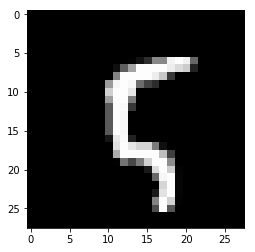

In [15]:
plt.imshow(single_img, cmap = 'gray')

In [17]:
y_train[100]

5

In [18]:
y_train.shape

(60000,)

In [24]:
#Covert the y_train to categories

In [25]:
from keras.utils.np_utils import to_categorical

In [26]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
#Normalize the pictures in order for the values of pixels between 0 and 1

In [29]:
x_train = x_train/ x_train.max()

In [30]:
x_test = x_test/ x_test.max()

In [31]:
scaled_image = x_train[0]

In [32]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
#Reshape the input images


In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_train = x_train.reshape(60000,28,28,1)

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
x_test = x_test.reshape(10000,28,28,1)

In [39]:
x_test.shape

(10000, 28, 28, 1)

In [40]:
#Build Our Model

In [41]:
from keras.models import Sequential

In [42]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [45]:
#create the model
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size = (2,2)))

#Flatten the data or the layers.
#2D to 1D
model.add(Flatten())

#Dense Layer
model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(10,activation = 'softmax'))

#Last Function
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x_train, y_cat_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 21s 354us/step - loss: 0.1433 - acc: 0.9568
Epoch 2/5
60000/60000 [==============================] - 21s 344us/step - loss: 0.0485 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.0343 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 21s 347us/step - loss: 0.0269 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 21s 344us/step - loss: 0.0217 - acc: 0.9941


In [48]:
model.metrics_names

['loss', 'acc']

In [49]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 153us/step


[0.04506109920802082, 0.9875]

In [50]:
from sklearn.metrics import classification_report

In [51]:
predictions = model.predict_classes(x_test)

In [52]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [55]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.98      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.98      0.99      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [57]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        